In [19]:
print("UAS MUHAMAD WINO JATI PINULUNG_202331205")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

UAS MUHAMAD WINO JATI PINULUNG_202331205


In [20]:
data = pd.read_csv('ethereum.csv')

# Ini untuk menambahkan dataset yang akan kita prosessssssss gayss

In [21]:
selected_columns = ['Value_IN(ETH)', 'Value_OUT(ETH)', 'TxnFee(ETH)']
features = data[selected_columns]

# Ini buat milih kolom untuk clustering geysss, disini saya pilih 3.

In [22]:
data.isnull().sum()

#Untuk memeriksa apakah ada nilai null atau kosong(tidak diisi)

Blockno                                 0
UnixTimestamp                           0
DateTime (UTC)                          0
Value_IN(ETH)                           0
Value_OUT(ETH)                          0
CurrentValue @ $3083.38454496098/Eth    0
TxnFee(ETH)                             0
TxnFee(USD)                             0
Historical $Price/Eth                   0
dtype: int64

In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Kalo ini buat normalisasi agar mengubah skala nilai fitur dalam dataset sehingga fitur-fitur tersebut memiliki rentang nilai
# yang seragam dan setara

In [24]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features)

# kode diatas berfungsi untuk melakukan vlustering/membentuk model K-Means

KMeans(n_clusters=3, random_state=42)

In [25]:
data['Cluster'] = kmeans.predict(scaled_features)

# Menambahkan hasil clustering ke datasett

In [26]:
print(data[['Value_IN(ETH)', 'Value_OUT(ETH)', 'TxnFee(ETH)', 'Cluster']].head())

# ini untuk menampilkan head atau 5 data teratas, termasuk cluster yang sudah saya buat.

   Value_IN(ETH)  Value_OUT(ETH)  TxnFee(ETH)  Cluster
0            0.0               0     0.002915        0
1            0.0               0     0.004286        0
2            0.0               0     0.000817        0
3            0.0               0     0.002683        0
4            0.0               0     0.003421        0


In [27]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

# Hadil jarak kuadrat dalam cluster, menggunakan inertia

Inertia: 3262.2249964951106


In [28]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_features, data['Cluster'])
print(f'Silhouette Score: {score}')

# saya menggunakan metrik silhouette Score untuk mengevaluasi seberapa baik cluster yang terbentuk
# Hasil 0.9 adalah hasil yang baik atau menunjukan bahwa data berada di cluster yang tepat.

Silhouette Score: 0.9563281525773731


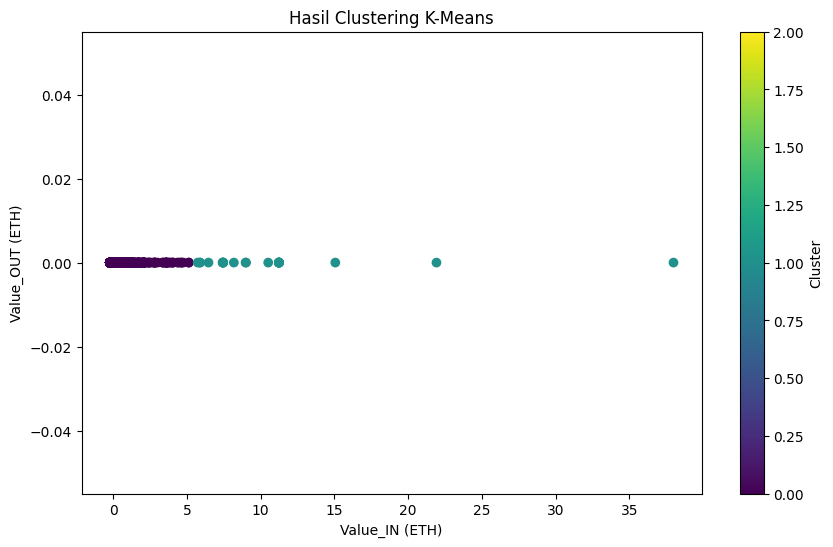

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Hasil Clustering K-Means')
plt.xlabel('Value_IN (ETH)')
plt.ylabel('Value_OUT (ETH)')
plt.colorbar(label='Cluster')
plt.show()

#ini hanya untuk memvisualisasi hasil 2 fitur pertama dari clustering diatas.

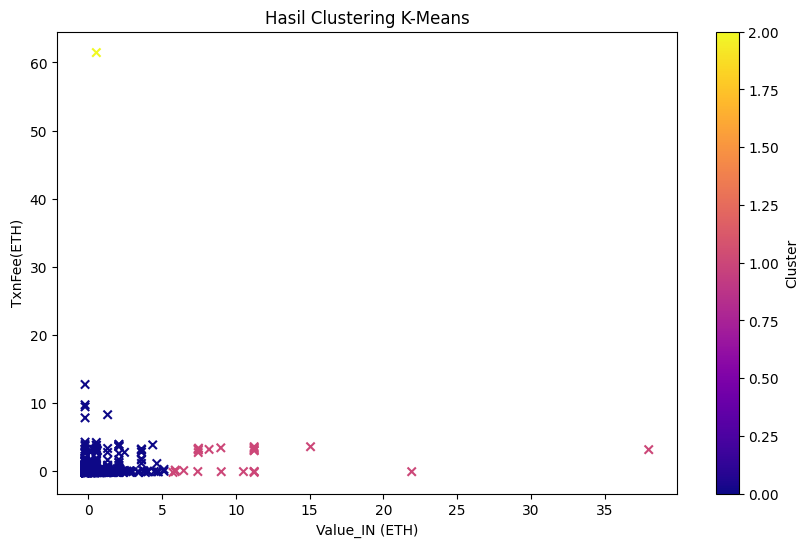

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 2], c=data['Cluster'], cmap='plasma', marker='x')
plt.title('Hasil Clustering K-Means')
plt.xlabel('Value_IN (ETH)')
plt.ylabel('TxnFee(ETH)')
plt.colorbar(label='Cluster')
plt.show()

In [32]:
print(data[['Value_IN(ETH)', 'Value_OUT(ETH)', 'TxnFee(ETH)', 'Cluster']].head())

   Value_IN(ETH)  Value_OUT(ETH)  TxnFee(ETH)  Cluster
0            0.0               0     0.002915        0
1            0.0               0     0.004286        0
2            0.0               0     0.000817        0
3            0.0               0     0.002683        0
4            0.0               0     0.003421        0
